In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

In [24]:
data = pd.read_csv("C:/Users/aksin52/Documents/Statistics Online Classes/bank.csv", na_values =['NA'])

In [25]:
#In case you need to create an 1/0 Target Variable
import numpy as np
data['target']=np.where(data['default']=='no', 0,1)
data['target'].mean()

0.0150510661171833

In [26]:
col_num= ['age','balance','day','duration','campaign','pdays','previous']
col_char=['job','marital','loan','deposit','education','housing','contact','month','poutcome']


In [27]:
X_char_dum = pd.get_dummies(data[col_char], drop_first = True)

In [28]:
X_data_fin=pd.concat([data[col_num],X_char_dum],axis=1, join='inner')

In [29]:
x=X_data_fin
y=data['target']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3)

In [43]:
fit_rf = RandomForestClassifier(random_state=44)

We will perform GRID SEARCH to find out the right set of parameters for the Random Forest Model

In [44]:
np.random.seed(44)

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto'}


Build a Forest  with 400 Trees or Estimators

In [46]:
# Random Forest with 400 estimators
rf_400 = RandomForestClassifier(n_estimators=400,
                  bootstrap=True,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2)
rf_400.fit(x_train, y_train)
rf_400_score_train = rf_400.score(x_train, y_train)
print("Training score: ",rf_400_score_train)
rf_400_score_test = rf_400.score(x_test, y_test)
print("Testing score: ",rf_400_score_test)

Training score:  0.984384999360041
Testing score:  0.986264556584055


Build a Forest with 800 Trees or Estimators

In [47]:
# Random Forest with 800 estimators
rf_800 = RandomForestClassifier(n_estimators=800,
                  bootstrap=True,              
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2)
rf_800.fit(x_train, y_train)
rf_800_score_train = rf_800.score(x_train, y_train)
print("Training score: ",rf_800_score_train)
rf_800_score_test = rf_800.score(x_test, y_test)
print("Testing score: ",rf_800_score_test)

Training score:  0.984384999360041
Testing score:  0.986264556584055


Build a Forest with 1000 Trees or Estimators

In [41]:
# Random Forest with 1000 estimators
rf_1000 = RandomForestClassifier(n_estimators=200,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2)
rf_1000.fit(x_train, y_train)
rf_1000_score_train = rf_1000.score(x_train, y_train)
print("Training score: ",rf_1000_score_train)
rf_1000_score_test = rf_1000.score(x_test, y_test)
print("Testing score: ",rf_1000_score_test)

Training score:  0.9851047149736812
Testing score:  0.9843260188087775


The code snippet below retrieves the variable importance and make them into a Dataframe

In [48]:
import pandas as pd
feature_importances=pd.DataFrame(rf_400.feature_importances_,
                                 index=x_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)

In [23]:
feature_importances

,importance
balance,0.343058
campaign,0.062019
loan_yes,0.059809
day,0.051589
age,0.047910
duration,0.046696
month_jul,0.044506
previous,0.039648
pdays,0.038139
poutcome_unknown,0.024371


Explaining the behavior of Top Drivers in the Random Forest with the target variable

The Snippet below can be used for Continous variables

In [ ]:
data['Rank']=pd.qcut(data['campaign'].rank(method='first').values,10,duplicates='drop').codes+1
gr_data = data.groupby(['Rank']) 
gr_data.max()
data.groupby('Rank')['target'].mean()

The snippet below is to show how the top categorical drivers relate to the target

In [52]:
data.groupby('loan').target.mean()

loan
no     0.011441
yes    0.039041
Name: target, dtype: float64

AUC Chart

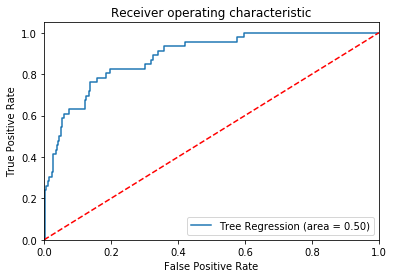

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

tree_roc_auc=roc_auc_score(y_test, rf_400.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, rf_400.predict_proba(x_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % tree_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Estimating the Model's ability to discriminate observations based on Predicted Probabilities

In [54]:
y_pred_prob = rf_400.predict_proba(x)[:, 1]
data['y_pred_P']=pd.DataFrame(y_pred_prob)
data['P_Rank']=pd.qcut(data['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
data.groupby('P_Rank')['target'].sum()

P_Rank
1       0
2       2
3       2
4       1
5       4
6       5
7       9
8      16
9      27
10    102
Name: target, dtype: int32